In [1]:
import networkx as nx
import pickle
import math
import matplotlib.pyplot as plt

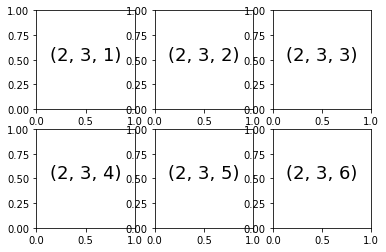

In [2]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

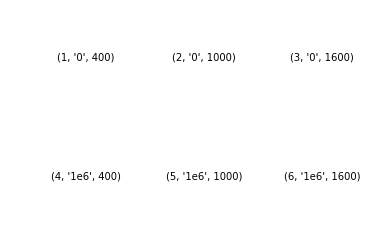

In [3]:
temp = [400, 1000, 1600]; kzz = ["0", "1e6"]
i = 1
for k in kzz:
    for t in temp:
        plt.subplot(2,3,i)
        plt.text(0.5, 0.5, str((i, k, t)),
             fontsize=10, ha='center')
        plt.axis("off")
        i += 1

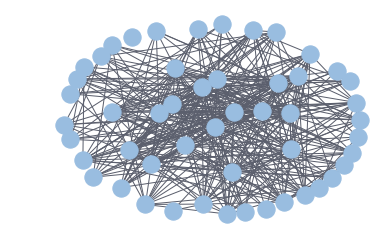

In [21]:
G = nx.read_gml("new_1600k_kzz=0.gml")

#seed=1000
#pos =nx.kamada_kawai_layout(G)
#iterations = 200; kfactor = 50; seed=1000


iterations = 200; kfactor = 50; seed=1000
pos = nx.fruchterman_reingold_layout(G, iterations=iterations, k=kfactor, threshold=1e-16, seed=seed, weight='logWeight')
#pos =nx.spring_layout(G,  iterations=10, weight='logWeight', scale=1.0)
nx.draw_networkx_nodes(G, pos, alpha=1, node_color='#99bde0');
nx.draw_networkx_edges(G, pos, width=1, alpha=1, edge_color='#5b5f6d');
plt.axis("off");



In [22]:
with open("list_temp.pickle", 'rb') as file:
    list_temp = pickle.load(file)

In [23]:
list_temp

['1000k_kzz',
 '1400k_kzz',
 '1600k_kzz',
 '1800k_kzz',
 '2000k_kzz',
 '2200k_kzz',
 '2500k_kzz',
 '2800k_kzz',
 '3000k_kzz',
 '400k_kzz',
 '500k_kzz',
 '750k_kzz',
 '900k_kzz']

In [24]:
short_temp = [400, 1000, 1600, 2200, 2800]
#short_temp = [400, 1000, 1600, 2200]


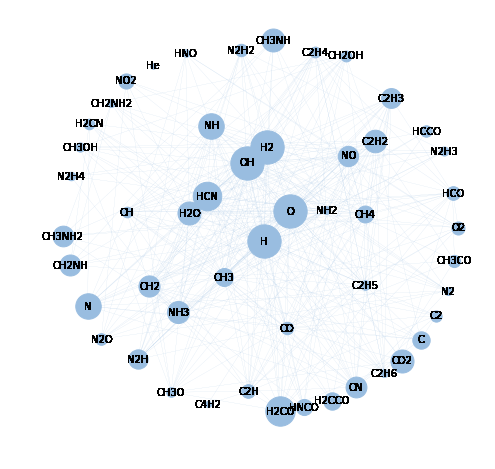

In [25]:
plt.figure(figsize=(8, 8))

i = 1
for t in [3000]: 
    plt.subplot(1,1,i)
#     plt.text(0.5, 0.5, str((i, k, t)),
#          fontsize=10, ha='center', va='bottom')
    plt.axis("off")
    G = nx.read_gml("new_%dk_kzz=%d.gml"%(t, 0))   
    
    
    for n in G.nodes(data=True):
        #print n
        nsize = 17*math.pow(1.25, n[1]['logWDegree'] - 98) + 30
        nx.draw_networkx_nodes(G, pos, nodelist = [n[0]], alpha=1, node_color='#99bde0', node_size= nsize)
        nx.draw_networkx_labels(G, pos, nodelist = [n[0]], label=n[0], font_size=10)

    #nx.draw_networkx_edges(G, pos, width=0.1, alpha=1, edge_color='#5b5f6d');

    for u, v in G.edges():
        #print u, v, G[u][v]
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=1, width=0.1, edge_color='#99bde0')
    i+=1
    
plt.savefig("node_labels.pdf")

In [28]:
#color_map = {400:'#4DD0E1', 1000:'#CDDC39', 1600: '#FFEB3B' , 2200:'#FF6F00', 2800:'#BF360C'}  ==> all plots before the right one label
color_map = {400:'#4DD0E1', 1000:'#CDDC39', 1600: '#FFEB3B' , 2200:'#FF6F00', 2800:'#E74C3C'}


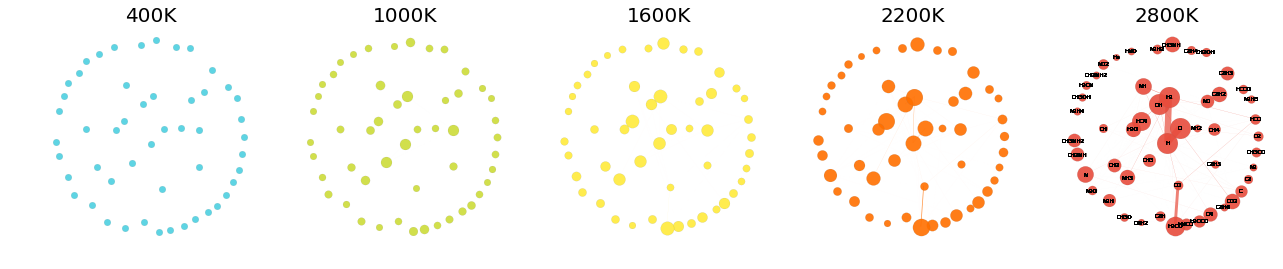

In [32]:
plt.figure(figsize=(22, 4))
i = 1
for t in short_temp: 
    plt.subplot(1,5,i)
    plt.title("%dK"%t, fontsize=20)
#     plt.text(0.5, 0.5, str((i, k, t)),
#          fontsize=10, ha='center', va='bottom')
    plt.axis("off")
    G = nx.read_gml("new_%dk_kzz=%d.gml"%(t, 0))   
    
    
    for n in G.nodes(data=True):
        #print n
        nsize = 7*math.pow(1.25, n[1]['logWDegree'] - 98) + 45
        nx.draw_networkx_nodes(G, pos, nodelist = [n[0]], alpha=0.9, node_color=color_map[t], node_size= nsize, edgecolors='#757575',linewidths = 0.1 )
        #nx.draw_networkx_nodes(G, pos, nodelist = [n[0]], alpha=1, node_color='#99bde0', node_size= nsize)
        if t == 2800:
            nx.draw_networkx_labels(G, pos, nodelist = [n[0]], label=n[0], font_size=5.5)

    #nx.draw_networkx_edges(G, pos, width=0.1, alpha=1, edge_color='#5b5f6d');

    for u, v in G.edges():
        #print u, v, G[u][v]
        esize = math.pow(3, G[u][v]['logWeight'] - 220) 
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=0.7, width=esize, edge_color = color_map[t])#='#424242')
    i+=1
plt.savefig("net_viz_jupiter_temp2_one_label_right.pdf")

In [ ]:
nx.draw_networkx_nodes(G, pos, alpha=1, node_color='#99bde0');
nx.draw_networkx_edges(G, pos, width=1, alpha=1, edge_color='#5b5f6d');
plt.axis("off");

In [ ]:
nx.draw_networkx_nodes(G, pos, alpha=1, node_color='#99bde0');
plt.axis("off");

In [ ]:
for n in G.nodes(data=True):
    #print n
    nx.draw_networkx_nodes(G, pos, nodelist = [n[0]], alpha=1, node_color='#99bde0', node_size=math.pow(1.55, n[1]['logWDegree'] - 99))
    #nx.draw_networkx_labels(G, pos, nodelist = [n[0]], label=n[0], font_size=8)

#nx.draw_networkx_edges(G, pos, width=0.1, alpha=1, edge_color='#5b5f6d');
    
for u, v in G.edges():
    #print u, v, G[u][v]
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=1, width=0.2, edge_color='#99bde0')
    
plt.axis("off");